In [4]:
#Importing library 
import numpy as np
import pandas as pd
import os

In [6]:
#Reading the dataset 
data11 = pd.read_excel('Student Applications & Performance.xlsx')

In [52]:
#Overlook on the dataset
data11.head(17)

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,FIRSTSEM_COURSENAME_4,FIRSTSEM_COURSENAME_5,FIRSTSEM_COURSENAME_6,SECONDSEM_1_COURSENAME,SECONDSEM_2_COURSENAME,SECONDSEM_3_COURSENAME,SECONDSEM_4_COURSENAME,SECONDSEM_5_COURSENAME,SECONDSEM_6_COURSENAME,FIN_AID
0,7808615,18,F,BGD_1,Y,N,Undeclared,N,NaN,1150.0,...,PSYC,NotEnrolled,NotEnrolled,CHEM,CHEM,COMM,ITDS,NotEnrolled,NotEnrolled,0.0
1,7830063,19,F,BGD_1,N,N,Undeclared,N,26.0,NaN,...,MATH,THEA,POLS,ECON,ENGL,NotEnrolled,NotEnrolled,NotEnrolled,NotEnrolled,110700.0
2,7847538,18,M,BGD_1,Y,N,Mathematics,N,NaN,1020.0,...,MATH,SOCI,NotEnrolled,ENGL,ENVS,MUSC,NotEnrolled,NotEnrolled,NotEnrolled,0.0
3,8006429,18,M,BGD_1,Y,N,Undeclared,N,NaN,1210.0,...,NotEnrolled,NotEnrolled,NotEnrolled,ENGL,HIST,LEAD,MUSC,NotEnrolled,NotEnrolled,0.0
4,7962680,18,F,BGD_1,Y,N,Art,N,NaN,1200.0,...,MATH,NotEnrolled,NotEnrolled,COMM,ENGL,HIST,PSYC,NotEnrolled,NotEnrolled,557580.0
5,7815697,18,M,BGD_1,Y,N,Political Science,N,NaN,1050.0,...,MUSC,PSYC,NotEnrolled,BIOL,ENGL,ITDS,POLS,NotEnrolled,NotEnrolled,0.0
6,7838856,18,F,BGD_1,Y,N,Biology,N,NaN,580.0,...,ENGL,HIST,MATH,ENGL,ITDS,NotEnrolled,NotEnrolled,NotEnrolled,NotEnrolled,0.0
7,7960448,18,F,BGD_1,Y,N,Biology,N,NaN,750.0,...,ENGL,NotEnrolled,NotEnrolled,ENGL,ITDS,NotEnrolled,NotEnrolled,NotEnrolled,NotEnrolled,0.0
8,7944779,18,F,BGD_3,Y,N,Accounting,N,NaN,1060.0,...,POLS,NotEnrolled,NotEnrolled,ECON,ENGL,MATH,NotEnrolled,NotEnrolled,NotEnrolled,0.0
9,7902044,18,F,BGD_1,Y,N,Undeclared,N,NaN,NaN,...,MATH,NotEnrolled,NotEnrolled,ENGL,HIST,LEAD,PSYC,NotEnrolled,NotEnrolled,0.0


In [15]:
data11.shape

(3400, 56)

In [16]:
data11.dtypes

STUDENT IDENTIFIER            int64
STDNT_AGE                     int64
STDNT_GENDER                 object
STDNT_BACKGROUND             object
IN_STATE_FLAG                object
INTERNATIONAL_STS            object
STDNT_MAJOR                  object
STDNT_MINOR                  object
STDNT_TEST_ENTRANCE1        float64
STDNT_TEST_ENTRANCE2        float64
STDNT_TEST_ENTRANCE_COMB    float64
FIRST_TERM                    int64
CORE_COURSE_NAME_1_F         object
CORE_COURSE_GRADE_1_F        object
CORE_COURSE_NAME_2_F         object
CORE_COURSE_GRADE_2_F        object
CORE_COURSE_NAME_3_F         object
CORE_COURSE_GRADE_3_F        object
CORE_COURSE_NAME_4_F         object
CORE_COURSE_GRADE_4_F        object
CORE_COURSE_NAME_5_F         object
CORE_COURSE_GRADE_5_F        object
CORE_COURSE_NAME_6_F         object
CORE_COURSE_GRADE_6_F        object
SECOND_TERM                   int64
CORE_COURSE_NAME_1_S         object
CORE_COURSE_GRADE_1_S        object
CORE_COURSE_NAME_2_S        

In [19]:
# reversing the o and 1s in Dependent variable

data11['STUDENT_LEFT'] = data11.RETURNED_2ND_YR
data11.STUDENT_LEFT.value_counts()
data11.STUDENT_LEFT.replace(0,2,inplace=True)
data11.STUDENT_LEFT.replace(1,0,inplace=True)
data11.STUDENT_LEFT.replace(2,1,inplace=True)
data11.STUDENT_LEFT.value_counts()
data11.RETURNED_2ND_YR.value_counts()

data11.STDNT_BACKGROUND.replace({'BGD 1':'BGD_1','BGD 2':'BGD_2','BGD 3':'BGD_3','BGD 4':'BGD_4','BGD 5':'BGD_5','BGD 6':'BGD_6','BGD 7':'BGD_7','BGD 8':'BGD_8'},inplace=True)

r = data11.STDNT_TEST_ENTRANCE_COMB.mode()
data11.STDNT_TEST_ENTRANCE_COMB.value_counts(dropna=False)

data11['STDNT_TEST_ENTRANCE_COMB'] = data11.STDNT_TEST_ENTRANCE_COMB.fillna(950)

data11.STDNT_TEST_ENTRANCE_COMB.isnull().sum()

data11.FIRST_TERM.head(10)
data11.FIRST_TERM.value_counts()


data11.DISTANCE_FROM_HOME = data11.DISTANCE_FROM_HOME.fillna(69)

data11.HIGH_SCHL_GPA = data11.HIGH_SCHL_GPA.fillna(data11.HIGH_SCHL_GPA.mean())

data11.count()

data11.SECOND_TERM_ATTEMPT_HRS.value_counts(dropna=False)

data11['SEC_TERM_PERFORMANCE'] = data11.SECOND_TERM_EARNED_HRS/data11.SECOND_TERM_ATTEMPT_HRS

data11.SECOND_TERM_EARNED_HRS.value_counts(dropna=False)

data11.count()

data11.SEC_TERM_PERFORMANCE.describe()
data11.SEC_TERM_PERFORMANCE.quantile(np.arange(0.95,1,0.001))

data11.SEC_TERM_PERFORMANCE[data11.SEC_TERM_PERFORMANCE >1]
data11.SEC_TERM_PERFORMANCE = data11.SEC_TERM_PERFORMANCE.replace(data11.SEC_TERM_PERFORMANCE[data11.SEC_TERM_PERFORMANCE >1],1)

data11.SEC_TERM_PERFORMANCE = data11.SEC_TERM_PERFORMANCE.fillna(0) # as no attempt and no points earned

data11['FIRST_TERM_PERFORMANCE'] = data11.FIRST_TERM_EARNED_HRS/data11.FIRST_TERM_ATTEMPT_HRS

data11['FIRST_TERM_PERFORMANCE'].describe()

data11.FIRST_TERM_PERFORMANCE[data11.FIRST_TERM_PERFORMANCE >1]
data11.FIRST_TERM_PERFORMANCE = data11.FIRST_TERM_PERFORMANCE.replace(data11.FIRST_TERM_PERFORMANCE[data11.FIRST_TERM_PERFORMANCE >1],1)

data11.CORE_COURSE_NAME_1_F.head(10)

data11.CORE_COURSE_NAME_1_F.str.split()

data11[['FIRSTSEM_COURSENAME_1','uselessnumbers']] = data11.CORE_COURSE_NAME_1_F.str.split(" ",expand=True)

data11.FIRSTSEM_COURSENAME_1.head()
data11.uselessnumbers.head()

data11[['FIRSTSEM_COURSENAME_2','uselessnumbers']] = data11.CORE_COURSE_NAME_2_F.str.split(" ",expand=True)
data11[['FIRSTSEM_COURSENAME_3','uselessnumbers']] = data11.CORE_COURSE_NAME_3_F.str.split(" ",expand=True)
data11[['FIRSTSEM_COURSENAME_4','uselessnumbers']] = data11.CORE_COURSE_NAME_4_F.str.split(" ",expand=True)

In [20]:
# Life and Career Planning in 5 Course Name
LACP =  data11.query("CORE_COURSE_NAME_5_F == 'Life and Career Planning'")['CORE_COURSE_NAME_5_F']
data11.CORE_COURSE_NAME_5_F = data11.CORE_COURSE_NAME_5_F.replace(LACP,'LACP 0070')
data11[['FIRSTSEM_COURSENAME_5','uselessnumbers']] = data11.CORE_COURSE_NAME_5_F.str.split(" ",expand=True)

In [21]:
# U.S. History to 1865 vin 6 Course name
USHT =  data11.query("CORE_COURSE_NAME_6_F == 'U.S. History to 1865'")['CORE_COURSE_NAME_6_F']
data11.CORE_COURSE_NAME_6_F = data11.CORE_COURSE_NAME_6_F.replace(USHT,'USHT 0070')
data11[['FIRSTSEM_COURSENAME_6','uselessnumbers']] = data11.CORE_COURSE_NAME_6_F.str.split(" ",expand=True)

In [24]:
#Second Sem Name

data11[['SECONDSEM_1_COURSENAME','uselessnumbers']] = data11.CORE_COURSE_NAME_1_S.str.split(" ",expand=True)
data11[['SECONDSEM_2_COURSENAME','uselessnumbers']] = data11.CORE_COURSE_NAME_2_S.str.split(" ",expand=True)
data11[['SECONDSEM_3_COURSENAME','uselessnumbers']] = data11.CORE_COURSE_NAME_3_S.str.split(" ",expand=True)
data11[['SECONDSEM_4_COURSENAME','uselessnumbers']] = data11.CORE_COURSE_NAME_4_S.str.split(" ",expand=True)
data11[['SECONDSEM_5_COURSENAME','uselessnumbers']] = data11.CORE_COURSE_NAME_5_S.str.split(" ",expand=True)
data11[['SECONDSEM_6_COURSENAME','uselessnumbers']] = data11.CORE_COURSE_NAME_6_S.str.split(" ",expand=True)


In [25]:
data11.count()
firstsemname = data11[['FIRSTSEM_COURSENAME_1','FIRSTSEM_COURSENAME_2','FIRSTSEM_COURSENAME_3','FIRSTSEM_COURSENAME_4','FIRSTSEM_COURSENAME_5','FIRSTSEM_COURSENAME_6']]
secondsemname = data11[['SECONDSEM_1_COURSENAME','SECONDSEM_2_COURSENAME','SECONDSEM_3_COURSENAME','SECONDSEM_4_COURSENAME','SECONDSEM_5_COURSENAME','SECONDSEM_6_COURSENAME']]


In [26]:
data11.count()
data11[['FIRSTSEM_COURSENAME_1','FIRSTSEM_COURSENAME_2','FIRSTSEM_COURSENAME_3', \
	'FIRSTSEM_COURSENAME_4','FIRSTSEM_COURSENAME_5','FIRSTSEM_COURSENAME_6']] \
	= data11[['FIRSTSEM_COURSENAME_1','FIRSTSEM_COURSENAME_2','FIRSTSEM_COURSENAME_3',\
	   'FIRSTSEM_COURSENAME_4','FIRSTSEM_COURSENAME_5','FIRSTSEM_COURSENAME_6']].fillna('NotEnrolled')

In [27]:
data11[['SECONDSEM_1_COURSENAME','SECONDSEM_2_COURSENAME','SECONDSEM_3_COURSENAME',\
	'SECONDSEM_4_COURSENAME','SECONDSEM_5_COURSENAME','SECONDSEM_6_COURSENAME']] \
	= data11[['SECONDSEM_1_COURSENAME','SECONDSEM_2_COURSENAME','SECONDSEM_3_COURSENAME',\
	   'SECONDSEM_4_COURSENAME','SECONDSEM_5_COURSENAME','SECONDSEM_6_COURSENAME']].fillna('NotEnrolled')

In [28]:
data11[['SECONDSEM_1_COURSENAME','SECONDSEM_2_COURSENAME','SECONDSEM_3_COURSENAME', \
	'SECONDSEM_4_COURSENAME','SECONDSEM_5_COURSENAME','SECONDSEM_6_COURSENAME']].head()

data11[['CORE_COURSE_GRADE_1_F','CORE_COURSE_GRADE_2_F','CORE_COURSE_GRADE_3_F','CORE_COURSE_GRADE_4_F','CORE_COURSE_GRADE_5_F','CORE_COURSE_GRADE_6_F']] =data11[['CORE_COURSE_GRADE_1_F','CORE_COURSE_GRADE_2_F','CORE_COURSE_GRADE_3_F','CORE_COURSE_GRADE_4_F','CORE_COURSE_GRADE_5_F','CORE_COURSE_GRADE_6_F']].fillna('NoGrades_F')

data11[['CORE_COURSE_GRADE_1_S','CORE_COURSE_GRADE_2_S','CORE_COURSE_GRADE_3_S','CORE_COURSE_GRADE_4_S','CORE_COURSE_GRADE_5_S','CORE_COURSE_GRADE_6_S']] = data11[['CORE_COURSE_GRADE_1_S','CORE_COURSE_GRADE_2_S','CORE_COURSE_GRADE_3_S','CORE_COURSE_GRADE_4_S','CORE_COURSE_GRADE_5_S','CORE_COURSE_GRADE_6_S']].fillna('NoGrades_S')
data11.CORE_COURSE_GRADE_5_S.head()

0    NoGrades_S
1    NoGrades_S
2    NoGrades_S
3    NoGrades_S
4    NoGrades_S
Name: CORE_COURSE_GRADE_5_S, dtype: object

In [29]:
data11[['UNMET_NEED','GROSS_FIN_NEED','COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION',]].head()
data11['FIN_AID'] = data11.GROSS_FIN_NEED - data11.UNMET_NEED
data11['FIN_AID'].head()

0         0.0
1    110700.0
2         0.0
3         0.0
4    557580.0
Name: FIN_AID, dtype: float64

In [33]:
data11.UNMET_NEED.describe()

count    3.400000e+03
mean     1.216422e+05
std      2.224368e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.876155e+05
max      1.632660e+06
Name: UNMET_NEED, dtype: float64

In [34]:
lessthan0 = data11.UNMET_NEED[data11.UNMET_NEED<0]
data11.UNMET_NEED = data11.UNMET_NEED.replace(lessthan0,0)

In [35]:
data11.dtypes

STUDENT IDENTIFIER          int64
STDNT_AGE                   int64
STDNT_GENDER               object
STDNT_BACKGROUND           object
IN_STATE_FLAG              object
                           ...   
SECONDSEM_3_COURSENAME     object
SECONDSEM_4_COURSENAME     object
SECONDSEM_5_COURSENAME     object
SECONDSEM_6_COURSENAME     object
FIN_AID                   float64
Length: 73, dtype: object

In [36]:
data11.columns

Index(['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND',
       'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
       'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F',
       'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F',
       'CORE_COURSE_GRADE_6_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S',
       'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S',
       'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S',
       'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'RETURNED_2ND_YR',
       'DISTANCE_FROM_

In [37]:
data11.count()

STUDENT IDENTIFIER        3400
STDNT_AGE                 3400
STDNT_GENDER              3400
STDNT_BACKGROUND          3400
IN_STATE_FLAG             3400
                          ... 
SECONDSEM_3_COURSENAME    3400
SECONDSEM_4_COURSENAME    3400
SECONDSEM_5_COURSENAME    3400
SECONDSEM_6_COURSENAME    3400
FIN_AID                   3400
Length: 73, dtype: int64

In [41]:
rfdf111 = data11[['STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND',
       'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM','STUDENT_LEFT',
       'CORE_COURSE_GRADE_1_F','CORE_COURSE_GRADE_2_F',
       'CORE_COURSE_GRADE_3_F','CORE_COURSE_GRADE_4_F',
       'CORE_COURSE_GRADE_5_F','CORE_COURSE_GRADE_6_F', 'SECOND_TERM',
       'CORE_COURSE_GRADE_1_S','CORE_COURSE_GRADE_2_S',
       'CORE_COURSE_GRADE_3_S','CORE_COURSE_GRADE_4_S',
       'CORE_COURSE_GRADE_5_S','CORE_COURSE_GRADE_6_S', 'HOUSING_STS',
       'FATHER_HI_EDU_DESC',
       'MOTHER_HI_EDU_DESC','DEGREE_GROUP_DESC',
       'GROSS_FIN_NEED', 'UNMET_NEED','FIN_AID',
       'SEC_TERM_PERFORMANCE', 'FIRST_TERM_PERFORMANCE',
       'FIRSTSEM_COURSENAME_1','FIRSTSEM_COURSENAME_2',
       'FIRSTSEM_COURSENAME_3', 'FIRSTSEM_COURSENAME_4',
       'FIRSTSEM_COURSENAME_5', 'FIRSTSEM_COURSENAME_6',
       'SECONDSEM_1_COURSENAME', 'SECONDSEM_2_COURSENAME',
       'SECONDSEM_3_COURSENAME', 'SECONDSEM_4_COURSENAME',
       'SECONDSEM_5_COURSENAME', 'SECONDSEM_6_COURSENAME',]]


In [42]:
rfdf111.head()

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,STUDENT_LEFT,...,FIRSTSEM_COURSENAME_3,FIRSTSEM_COURSENAME_4,FIRSTSEM_COURSENAME_5,FIRSTSEM_COURSENAME_6,SECONDSEM_1_COURSENAME,SECONDSEM_2_COURSENAME,SECONDSEM_3_COURSENAME,SECONDSEM_4_COURSENAME,SECONDSEM_5_COURSENAME,SECONDSEM_6_COURSENAME
0,18,F,BGD_1,Y,N,Undeclared,N,1150.0,200708,1,...,ENGL,PSYC,NotEnrolled,NotEnrolled,CHEM,CHEM,COMM,ITDS,NotEnrolled,NotEnrolled
1,19,F,BGD_1,N,N,Undeclared,N,1190.0,200808,0,...,ITDS,MATH,THEA,POLS,ECON,ENGL,NotEnrolled,NotEnrolled,NotEnrolled,NotEnrolled
2,18,M,BGD_1,Y,N,Mathematics,N,1030.0,201008,0,...,HIST,MATH,SOCI,NotEnrolled,ENGL,ENVS,MUSC,NotEnrolled,NotEnrolled,NotEnrolled
3,18,M,BGD_1,Y,N,Undeclared,N,1220.0,200708,0,...,NotEnrolled,NotEnrolled,NotEnrolled,NotEnrolled,ENGL,HIST,LEAD,MUSC,NotEnrolled,NotEnrolled
4,18,F,BGD_1,Y,N,Art,N,1190.0,200808,0,...,CPSC,MATH,NotEnrolled,NotEnrolled,COMM,ENGL,HIST,PSYC,NotEnrolled,NotEnrolled


In [43]:
rfdf111.count()

STDNT_AGE                   3400
STDNT_GENDER                3400
STDNT_BACKGROUND            3400
IN_STATE_FLAG               3400
INTERNATIONAL_STS           3400
STDNT_MAJOR                 3400
STDNT_MINOR                 3400
STDNT_TEST_ENTRANCE_COMB    3400
FIRST_TERM                  3400
STUDENT_LEFT                3400
CORE_COURSE_GRADE_1_F       3400
CORE_COURSE_GRADE_2_F       3400
CORE_COURSE_GRADE_3_F       3400
CORE_COURSE_GRADE_4_F       3400
CORE_COURSE_GRADE_5_F       3400
CORE_COURSE_GRADE_6_F       3400
SECOND_TERM                 3400
CORE_COURSE_GRADE_1_S       3400
CORE_COURSE_GRADE_2_S       3400
CORE_COURSE_GRADE_3_S       3400
CORE_COURSE_GRADE_4_S       3400
CORE_COURSE_GRADE_5_S       3400
CORE_COURSE_GRADE_6_S       3400
HOUSING_STS                 3400
FATHER_HI_EDU_DESC          3400
MOTHER_HI_EDU_DESC          3400
DEGREE_GROUP_DESC           3400
GROSS_FIN_NEED              3400
UNMET_NEED                  3400
FIN_AID                     3400
SEC_TERM_P

In [44]:
rfdf111.shape

(3400, 44)

In [45]:
rfdf111.dtypes

STDNT_AGE                     int64
STDNT_GENDER                 object
STDNT_BACKGROUND             object
IN_STATE_FLAG                object
INTERNATIONAL_STS            object
STDNT_MAJOR                  object
STDNT_MINOR                  object
STDNT_TEST_ENTRANCE_COMB    float64
FIRST_TERM                    int64
STUDENT_LEFT                  int64
CORE_COURSE_GRADE_1_F        object
CORE_COURSE_GRADE_2_F        object
CORE_COURSE_GRADE_3_F        object
CORE_COURSE_GRADE_4_F        object
CORE_COURSE_GRADE_5_F        object
CORE_COURSE_GRADE_6_F        object
SECOND_TERM                   int64
CORE_COURSE_GRADE_1_S        object
CORE_COURSE_GRADE_2_S        object
CORE_COURSE_GRADE_3_S        object
CORE_COURSE_GRADE_4_S        object
CORE_COURSE_GRADE_5_S        object
CORE_COURSE_GRADE_6_S        object
HOUSING_STS                  object
FATHER_HI_EDU_DESC           object
MOTHER_HI_EDU_DESC           object
DEGREE_GROUP_DESC            object
GROSS_FIN_NEED              

In [46]:
rfdf111.SECONDSEM_1_COURSENAME.value_counts()

ENGL           772
HIST           437
MATH           331
COMM           258
ECON           229
POLS           211
ARTH           175
NotEnrolled    157
BIOL           149
CHEM           132
PSYC            93
CPSC            78
ANTH            64
MUSC            61
ITDS            55
GEOL            46
SPAN            36
ENVS            29
FREN            21
THEA            17
STAT            16
ASTR            13
GEOG             9
SOCI             8
PHYS             3
Name: SECONDSEM_1_COURSENAME, dtype: int64

In [47]:
X1 = rfdf111.drop('STUDENT_LEFT', axis=1)
X1.shape

(3400, 43)

In [51]:
y1=rfdf111.STUDENT_LEFT
y1.head(17)

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
Name: STUDENT_LEFT, dtype: int64

In [53]:
X1 = pd.get_dummies(X1)
X1.shape

(3400, 503)

In [54]:
#RF package install
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.30, random_state=100)
X_train1.shape

(2380, 503)

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=100, oob_score=True,n_jobs=-1,random_state=200)
clf1.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=200, verbose=0,
                       warm_start=False)

In [56]:
clf1.oob_score_

0.8289915966386555

In [57]:
for w in range(10,300,20):
    clf1=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=200)
    clf1.fit(X_train1,y_train1)
    oob1=clf1.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob1))
    print('************************')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.7991596638655463
************************
For n_estimators = 30
OOB score is 0.8184873949579832
************************
For n_estimators = 50
OOB score is 0.8260504201680672
************************
For n_estimators = 70
OOB score is 0.8273109243697478
************************
For n_estimators = 90
OOB score is 0.8264705882352941
************************
For n_estimators = 110
OOB score is 0.8285714285714286
************************
For n_estimators = 130
OOB score is 0.8281512605042017
************************
For n_estimators = 150
OOB score is 0.8289915966386555
************************
For n_estimators = 170
OOB score is 0.8285714285714286
************************
For n_estimators = 190
OOB score is 0.8285714285714286
************************
For n_estimators = 210
OOB score is 0.8289915966386555
************************
For n_estimators = 230
OOB score is 0.8285714285714286
************************
For n_estimators = 250
OOB score is 0.8294117

In [58]:
for w in range(250,270,2):
    clf1=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=200)
    clf1.fit(X_train1,y_train1)
    oob1=clf1.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob1))
    print('************************')

For n_estimators = 250
OOB score is 0.8294117647058824
************************
For n_estimators = 252
OOB score is 0.8294117647058824
************************
For n_estimators = 254
OOB score is 0.8289915966386555
************************
For n_estimators = 256
OOB score is 0.8294117647058824
************************
For n_estimators = 258
OOB score is 0.8302521008403362
************************
For n_estimators = 260
OOB score is 0.8294117647058824
************************
For n_estimators = 262
OOB score is 0.8294117647058824
************************
For n_estimators = 264
OOB score is 0.8289915966386555
************************
For n_estimators = 266
OOB score is 0.8298319327731093
************************
For n_estimators = 268
OOB score is 0.8294117647058824
************************


In [ ]:
# Best score coming in 258
# For n_estimators = 258
#OOB score is 0.8302521008403362

In [59]:
# 258 Gave the best oob Scroe --- Finalizing
clf1=RandomForestClassifier(n_estimators=258,oob_score=True,n_jobs=-1,random_state=200)
clf1.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=258,
                       n_jobs=-1, oob_score=True, random_state=200, verbose=0,
                       warm_start=False)

In [60]:
clf1.oob_score_

0.8302521008403362

In [61]:
clf1.feature_importances_

array([7.84051584e-03, 2.10021410e-02, 1.55732988e-02, 1.52678875e-02,
       1.40474796e-02, 1.40380979e-02, 1.46704237e-02, 5.39218775e-02,
       1.80860571e-02, 5.91845956e-03, 5.94731069e-03, 6.35431867e-03,
       1.52295406e-03, 5.50722289e-03, 2.42975534e-03, 1.22733848e-03,
       1.00546004e-03, 1.07543791e-03, 3.73999786e-05, 3.79397985e-03,
       3.82800000e-03, 1.28047756e-03, 1.46839126e-03, 8.61719055e-04,
       4.04196858e-04, 1.64123711e-03, 2.76361064e-04, 3.59743506e-03,
       9.76709185e-04, 9.10493246e-04, 7.96457345e-06, 1.60399670e-03,
       9.26651556e-04, 3.49573964e-04, 2.63294811e-03, 2.40200917e-04,
       2.13822339e-03, 6.83075212e-04, 1.67572488e-03, 1.62493674e-03,
       5.02098492e-04, 2.21062240e-03, 1.34024461e-03, 8.90784627e-05,
       5.09990693e-04, 1.36331772e-03, 2.80353904e-04, 4.75566268e-07,
       3.53986335e-04, 9.10912180e-04, 6.67094656e-04, 5.67484587e-04,
       1.19193890e-03, 6.90613166e-04, 1.18414116e-05, 1.97385973e-03,
      

In [62]:
imp_feature1 = pd.Series(clf1.feature_importances_, index=X1.columns.tolist())
impdf = imp_feature1.sort_values(ascending=False)
impdf.head(30)

SEC_TERM_PERFORMANCE                  0.053922
CORE_COURSE_GRADE_1_S_NoGrades_S      0.046243
STDNT_TEST_ENTRANCE_COMB              0.021002
FIRST_TERM_PERFORMANCE                0.018086
SECONDSEM_2_COURSENAME_NotEnrolled    0.018078
SECONDSEM_1_COURSENAME_NotEnrolled    0.016301
FIRST_TERM                            0.015573
SECOND_TERM                           0.015268
FIN_AID                               0.014670
CORE_COURSE_GRADE_2_S_NoGrades_S      0.014282
GROSS_FIN_NEED                        0.014047
UNMET_NEED                            0.014038
CORE_COURSE_GRADE_1_S_B               0.008759
STDNT_AGE                             0.007841
MOTHER_HI_EDU_DESC_High School        0.007120
CORE_COURSE_GRADE_1_S_F               0.006949
CORE_COURSE_GRADE_2_S_B               0.006791
MOTHER_HI_EDU_DESC_College/Beyond     0.006569
CORE_COURSE_GRADE_1_S_C               0.006478
CORE_COURSE_GRADE_2_S_F               0.006450
FATHER_HI_EDU_DESC_College/Beyond     0.006369
STDNT_BACKGRO

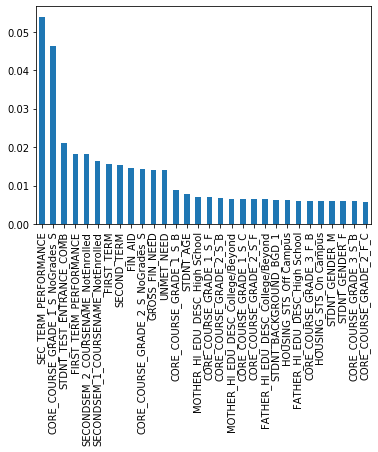

In [63]:
impdf.head(30).plot(kind='bar')

In [65]:
#Logistic
logdfdummy = data11[['STUDENT IDENTIFIER','STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND',
       'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM','STUDENT_LEFT',
       'CORE_COURSE_GRADE_1_F','CORE_COURSE_GRADE_2_F',
       'CORE_COURSE_GRADE_3_F','CORE_COURSE_GRADE_4_F',
       'CORE_COURSE_GRADE_5_F','CORE_COURSE_GRADE_6_F', 'SECOND_TERM',
       'CORE_COURSE_GRADE_1_S','CORE_COURSE_GRADE_2_S',
       'CORE_COURSE_GRADE_3_S','CORE_COURSE_GRADE_4_S',
       'CORE_COURSE_GRADE_5_S','CORE_COURSE_GRADE_6_S', 'HOUSING_STS',
       'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA','FATHER_HI_EDU_DESC',
       'MOTHER_HI_EDU_DESC','DEGREE_GROUP_DESC',
       'GROSS_FIN_NEED', 'UNMET_NEED','FIN_AID',
       'SEC_TERM_PERFORMANCE', 'FIRST_TERM_PERFORMANCE',
       'FIRSTSEM_COURSENAME_1','FIRSTSEM_COURSENAME_2',
       'FIRSTSEM_COURSENAME_3', 'FIRSTSEM_COURSENAME_4',
       'FIRSTSEM_COURSENAME_5', 'FIRSTSEM_COURSENAME_6',
       'SECONDSEM_1_COURSENAME', 'SECONDSEM_2_COURSENAME',
       'SECONDSEM_3_COURSENAME', 'SECONDSEM_4_COURSENAME',
       'SECONDSEM_5_COURSENAME', 'SECONDSEM_6_COURSENAME',]]

In [66]:
logdfdummy.shape

(3400, 47)

In [67]:
logdfdummy1 = pd.get_dummies(logdfdummy)

In [72]:
logdf = logdfdummy1

In [73]:
logdf.HIGH_SCHL_GPA.describe()
logdf.HIGH_SCHL_GPA.quantile(np.arange(0,0.01,0.001))

0.000    0.00000
0.001    1.96394
0.002    2.00000
0.003    2.00000
0.004    2.02384
0.005    2.07000
0.006    2.10000
0.007    2.13000
0.008    2.13000
0.009    2.15591
Name: HIGH_SCHL_GPA, dtype: float64

In [75]:
logdf.HIGH_SCHL_GPA = logdf.HIGH_SCHL_GPA.replace(logdf.HIGH_SCHL_GPA[logdf.HIGH_SCHL_GPA == 0],1.96)

In [76]:
logdf.rename(columns={'FATHER_HI_EDU_DESC_High School':'FATHER_HI_EDU_DESC_High_School','HOUSING_STS_On Campus':'HOUSING_STS_On_Campus', \
			'STDNT_BACKGROUND_BGD 1':'STDNT_BACKGROUND_BGD_1','HOUSING_STS_Off Campus':'HOUSING_STS_Off_Campus', \
			'MOTHER_HI_EDU_DESC_High School':'MOTHER_HI_EDU_DESC_High_School'},inplace=True)
logdf.rename(columns={'MOTHER_HI_EDU_DESC_College/Beyond':'MOTHER_HI_EDU_DESC_CollegeBeyond', \
		      'FATHER_HI_EDU_DESC_College/Beyond':'FATHER_HI_EDU_DESC_CollegeBeyond'},inplace=True)

In [77]:
logdf1= logdf

In [79]:
logdf_train = logdf1.sample(frac =0.70 , random_state=150)
logdf_test = logdf1.drop(logdf_train.index)

In [81]:
logdf_train.shape

(2380, 507)

In [82]:
logdf_test.shape

(1020, 507)

In [83]:
logdf_train.FIN_AID.head()

1973    1293060.0
2134     498000.0
2875          0.0
1639          0.0
1717          0.0
Name: FIN_AID, dtype: float64

In [84]:
# LOG Model start
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [86]:
logdf_train.count()

STUDENT IDENTIFIER             2380
STDNT_AGE                      2380
STDNT_TEST_ENTRANCE_COMB       2380
FIRST_TERM                     2380
STUDENT_LEFT                   2380
                               ... 
SECONDSEM_6_COURSENAME_PSYC    2380
SECONDSEM_6_COURSENAME_SOCI    2380
SECONDSEM_6_COURSENAME_SPAN    2380
SECONDSEM_6_COURSENAME_STAT    2380
SECONDSEM_6_COURSENAME_THEA    2380
Length: 507, dtype: int64

In [87]:
logdf.count()

STUDENT IDENTIFIER             3400
STDNT_AGE                      3400
STDNT_TEST_ENTRANCE_COMB       3400
FIRST_TERM                     3400
STUDENT_LEFT                   3400
                               ... 
SECONDSEM_6_COURSENAME_PSYC    3400
SECONDSEM_6_COURSENAME_SOCI    3400
SECONDSEM_6_COURSENAME_SPAN    3400
SECONDSEM_6_COURSENAME_STAT    3400
SECONDSEM_6_COURSENAME_THEA    3400
Length: 507, dtype: int64

In [88]:
def mod(yX,number):
	model11=smf.glm(yX,data = logdf_train, family=sm.families.Binomial()).fit()
	print('LogisticModel',number)
	print(model11.summary())
	return model11

In [92]:
# Check Multi Coolinearity
y=logdf_train.STUDENT_LEFT
X1= logdf_train.drop('STUDENT_LEFT',axis=1)
y.head()

1973    0
2134    0
2875    0
1639    0
1717    0
Name: STUDENT_LEFT, dtype: int64

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


from patsy import dmatrices
y, X1 = dmatrices("STUDENT_LEFT~SEC_TERM_PERFORMANCE+ \
	CORE_COURSE_GRADE_2_S_NoGrades_S+SECONDSEM_2_COURSENAME_NotEnrolled+ \
	HOUSING_STS_On_Campus+  \
	 INTERNATIONAL_STS_Y+  \
	  \
	CORE_COURSE_GRADE_2_S_D+ \
	STDNT_BACKGROUND_BGD_1+ \
	STDNT_GENDER_F+STDNT_MAJOR_Psychology",
		   data=logdf_train, return_type='dataframe')


In [95]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor
0,18.392601
1,1.432878
2,inf
3,inf
4,1.067939
5,1.004368
6,1.053714
7,1.080427
8,1.032300
9,1.018141


In [96]:
vif['Independent_Var'] = X1.columns

In [97]:
vif.round(1)

,VIF Factor,Independent_Var
0,18.4,Intercept
1,1.4,SEC_TERM_PERFORMANCE
2,inf,CORE_COURSE_GRADE_2_S_NoGrades_S
3,inf,SECONDSEM_2_COURSENAME_NotEnrolled
4,1.1,HOUSING_STS_On_Campus
5,1.0,INTERNATIONAL_STS_Y
6,1.1,CORE_COURSE_GRADE_2_S_D
7,1.1,STDNT_BACKGROUND_BGD_1
8,1.0,STDNT_GENDER_F
9,1.0,STDNT_MAJOR_Psychology


In [98]:
vif.round(2)

,VIF Factor,Independent_Var
0,18.39,Intercept
1,1.43,SEC_TERM_PERFORMANCE
2,inf,CORE_COURSE_GRADE_2_S_NoGrades_S
3,inf,SECONDSEM_2_COURSENAME_NotEnrolled
4,1.07,HOUSING_STS_On_Campus
5,1.00,INTERNATIONAL_STS_Y
6,1.05,CORE_COURSE_GRADE_2_S_D
7,1.08,STDNT_BACKGROUND_BGD_1
8,1.03,STDNT_GENDER_F
9,1.02,STDNT_MAJOR_Psychology


In [99]:
vif.round(3)

,VIF Factor,Independent_Var
0,18.393,Intercept
1,1.433,SEC_TERM_PERFORMANCE
2,inf,CORE_COURSE_GRADE_2_S_NoGrades_S
3,inf,SECONDSEM_2_COURSENAME_NotEnrolled
4,1.068,HOUSING_STS_On_Campus
5,1.004,INTERNATIONAL_STS_Y
6,1.054,CORE_COURSE_GRADE_2_S_D
7,1.080,STDNT_BACKGROUND_BGD_1
8,1.032,STDNT_GENDER_F
9,1.018,STDNT_MAJOR_Psychology


In [100]:
##Add that in model removing ---CORE_COURSE_GRADE_2_S_NoGrades_S
finalmodel=smf.glm("STUDENT_LEFT~SEC_TERM_PERFORMANCE+ \
	SECONDSEM_2_COURSENAME_NotEnrolled+ \
	HOUSING_STS_On_Campus+  \
	 INTERNATIONAL_STS_Y+  \
	  \
	CORE_COURSE_GRADE_2_S_D+ \
	STDNT_BACKGROUND_BGD_1+ \
	STDNT_GENDER_F+STDNT_MAJOR_Psychology",data = logdf_train, family=sm.families.Binomial()).fit()
	
print(finalmodel.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           STUDENT_LEFT   No. Observations:                 2380
Model:                            GLM   Df Residuals:                     2371
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1050.8
Date:                Sat, 28 Mar 2020   Deviance:                       2101.7
Time:                        21:34:40   Pearson chi2:                 2.44e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [101]:
## Let's check confusion matrix and AUC
import sklearn.metrics as metrics
y_true=logdf_test['STUDENT_LEFT']
y_pred=finalmodel.predict(logdf_test)

y_pred.head()

2     0.131324
5     0.092346
7     0.135278
13    0.147548
14    0.188611
dtype: float64

In [102]:
y_true=logdf_test['STUDENT_LEFT']
y_pred=finalmodel.predict(logdf_test).map(lambda x:1 if x > 0.6 else 0)
metrics.confusion_matrix(y_true,y_pred)

array([[801,   8],
       [162,  49]])

In [103]:
y_score=finalmodel.predict(logdf_test)
fpr,tpr,thresholds=metrics.roc_curve(y_true,y_score)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

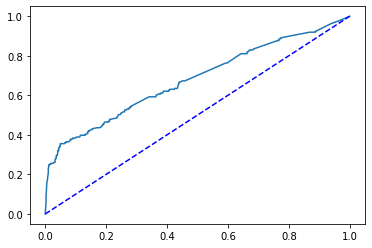

In [105]:
plt.plot(fpr,tpr,"-")
plt.plot(x,y,'b--')

In [106]:
#Extracting the TPR and FPR for Tableau visualization

df = pd.DataFrame()
df['False+ve_Rate']=pd.Series(fpr)
df['True+ve_Rate']=pd.Series(tpr)

df.head()

,False+ve_Rate,True+ve_Rate
0,0.000000,0.000000
1,0.000000,0.004739
2,0.002472,0.052133
3,0.002472,0.056872
4,0.002472,0.094787


In [107]:
df.to_csv('/Users/somesh/Desktop/tpr_fpr.csv')

In [108]:
## AUC
metrics.roc_auc_score(y_true,y_score)

0.6790871651269192

In [109]:
#Gains

logdf_test['prob']=finalmodel.predict(logdf_test)
logdf_test['prob'].head()


2     0.131324
5     0.092346
7     0.135278
13    0.147548
14    0.188611
Name: prob, dtype: float64

In [110]:
logdf_test['prob_deciles']=pd.qcut(logdf_test['prob'],q=10)

logdf_test.sort_values('prob',ascending=False).head()


,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,STUDENT_LEFT,SECOND_TERM,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,GROSS_FIN_NEED,UNMET_NEED,...,SECONDSEM_6_COURSENAME_MUSC,SECONDSEM_6_COURSENAME_NotEnrolled,SECONDSEM_6_COURSENAME_POLS,SECONDSEM_6_COURSENAME_PSYC,SECONDSEM_6_COURSENAME_SOCI,SECONDSEM_6_COURSENAME_SPAN,SECONDSEM_6_COURSENAME_STAT,SECONDSEM_6_COURSENAME_THEA,prob,prob_deciles
3336,8018030,17,950.0,200608,1,200702,150.0,2.43,0,0.0,...,0,1,0,0,0,0,0,0,0.869983,"(0.415, 0.87]"
3275,7781453,18,1110.0,200908,1,201002,69.0,3.12,299820,194820.0,...,0,1,0,0,0,0,0,0,0.853893,"(0.415, 0.87]"
3394,7960053,18,990.0,201008,1,201102,138.0,3.21,0,0.0,...,0,1,0,0,0,0,0,0,0.853893,"(0.415, 0.87]"
3228,7814100,18,950.0,200908,1,201002,150.0,3.13,0,0.0,...,0,1,0,0,0,0,0,0,0.853893,"(0.415, 0.87]"
3197,7826537,18,950.0,200508,1,200602,150.0,2.54,909480,678360.0,...,0,1,0,0,0,0,0,0,0.853893,"(0.415, 0.87]"


In [111]:
gains=logdf_test.groupby("prob_deciles",as_index=False)['STUDENT_LEFT'].agg(['sum','count']).reset_index().sort_values("prob_deciles",
                 ascending=False)

gains.head(10)

,prob_deciles,sum,count
9,"(0.415, 0.87]",68,102
8,"(0.269, 0.415]",20,102
7,"(0.213, 0.269]",18,101
6,"(0.187, 0.213]",19,97
5,"(0.139, 0.187]",17,108
4,"(0.135, 0.139]",0,3
3,"(0.118, 0.135]",31,199
2,"(0.0923, 0.118]",15,102
1,"(0.0751, 0.0923]",7,100
0,"(0.0492, 0.0751]",16,106


In [112]:
gains.columns=["Deciles","TotalEvents","NumberObs"]

gains["PercEvents"]=gains['NumberObs']/gains['TotalEvents'].sum()
gains["CumulativeEvents"]=gains.PercEvents.cumsum()
gains

,Deciles,TotalEvents,NumberObs,PercEvents,CumulativeEvents
9,"(0.415, 0.87]",68,102,0.483412,0.483412
8,"(0.269, 0.415]",20,102,0.483412,0.966825
7,"(0.213, 0.269]",18,101,0.478673,1.445498
6,"(0.187, 0.213]",19,97,0.459716,1.905213
5,"(0.139, 0.187]",17,108,0.511848,2.417062
4,"(0.135, 0.139]",0,3,0.014218,2.431280
3,"(0.118, 0.135]",31,199,0.943128,3.374408
2,"(0.0923, 0.118]",15,102,0.483412,3.857820
1,"(0.0751, 0.0923]",7,100,0.473934,4.331754
0,"(0.0492, 0.0751]",16,106,0.502370,4.834123


In [113]:
## These are the STUDENTS to target
logdf_test.sort_values("prob",ascending=False)[['STUDENT IDENTIFIER','prob']].head(90)

,STUDENT IDENTIFIER,prob
3336,8018030,0.869983
3275,7781453,0.853893
3394,7960053,0.853893
3228,7814100,0.853893
3197,7826537,0.853893
...,...,...
2920,7902626,0.473492
3212,7757318,0.470469
2556,7807777,0.468715
2734,7840806,0.459797
